<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

Before you is the Jupiter Notebook of week 3.

In [88]:
%run Initialize/Week_3_Initialize.ipynb

Packages succesfully loaded


## 3.1) Wave and tidal information

### Part 1 - section B

In [14]:
W3_fig_5_13()

Output()

In [15]:
W3_fig_5_14()

FloatText(value=1.0, description='a1 [m]', step=0.01)

Output()

In [16]:
W3_fig_5_15()

FloatText(value=1.0, description='a1 [m]', step=0.01)

Output()

In [17]:
W3_fig_5_16()

FloatText(value=1.0, description='a1 [m]', step=0.01)

Output()

In [18]:
W3_fig_5_17()

FloatText(value=1.0, description='a1 [m]', step=0.01)

Output()

## 3.2) Wave transformation in the near-shore 

We continue on the application of the dispersion relationship in the cross-shore, which was discussed in week 3 and the Wave course.

### 3.2.1) Normal indicent waves

In Waves you should have programmed a function to compute the wave height along the cross-shore for normal incident waves. A similar function is defined below, together with a function to calculate the wavelength. 

In [19]:
# This function will be replaced with the one from Waves, by Jaime or otherwise in the course Ocean Waves from Marion Tissier

def wave_length(T, h):
    L = 9.81 * T**2 / (2 * np.pi)
    L_all = [L]

    for i in range(1500):
        L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
        L_all.append(L)

        # stop the iteration when the error is sufficiently small
        if np.abs(L_all[-1] - L_all[-2]) < 0.0005:
            break
            
    return round(L, 13)

In [20]:
def W3_normal_indicent_waves(H0, T, d0, slope):

    # The environmental conditons
    x = np.arange(0,900,.1)   # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given:
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wave length
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter  
    H = H0*Ksh                                    # The wave height due to shoaling (only)
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # The wave height

The graph below shows the outcome of the calculation. Can you use it to answer the questions?

In [21]:
W3_Q4()

Output()

Column
    [0] StaticText(value='Which method i...)
    [1] Row
        [0] StaticText(value='Linear interpolating t..., width=250)
        [1] Checkbox(width=120)
    [2] Row
        [0] StaticText(value='An explicit formula', width=250)
        [1] Checkbox(width=120)
    [3] Row
        [0] StaticText(value='Iterative approach', width=250)
        [1] Checkbox(width=120)
    [4] Row
        [0] Button(name='Check')
        [1] TextInput()

Column
    [0] StaticText(value='Which increases t...)
    [1] Row
        [0] StaticText(value='Increasing offshore w..., width=252)
        [1] Checkbox(width=120)
    [2] Row
        [0] StaticText(value='Increasing deep w..., width=252)
        [1] Checkbox(width=120)
    [3] Row
        [0] StaticText(value='Decreasing bed slope', width=252)
        [1] Checkbox(width=120)
    [4] Row
        [0] StaticText(value='Increasing wave p..., width=252)
        [1] Checkbox(width=120)
    [5] Row
        [0] Button(name='Check')
        [1] TextInput()

Column
    [0] StaticText(value='Which increases t...)
    [1] Row
        [0] StaticText(value=' A larger offshore w..., width=250)
        [1] Checkbox(width=120)
    [2] Row
        [0] StaticText(value='Increasing the d..., width=250)
        [1] Checkbox(width=120)
    [3] Row
        [0] StaticText(value=' A larger wave p..., width=250)
        [1] Checkbox(width=120)
    [4] Row
        [0] StaticText(value='A steeper bed slope', width=250)
        [1] Checkbox(width=120)
    [5] Row
        [0] Button(name='Check')
        [1] TextInput()

Column
    [0] StaticText(value='Which of the f...)
    [1] Row
        [0] StaticText(value='Decreasing the d..., width=259)
        [1] Checkbox(width=120)
    [2] Row
        [0] StaticText(value='Increasing the w..., width=259)
        [1] Checkbox(width=120)
    [3] Row
        [0] StaticText(value='Increasing deepwater w..., width=259)
        [1] Checkbox(width=120)
    [4] Row
        [0] StaticText(value='Decreasing the b..., width=259)
        [1] Checkbox(width=120)
    [5] Row
        [0] Button(name='Check')
        [1] TextInput()

NameError: name 'Q5_text' is not defined

### 3.2.2) Wave height for oblique waves

The influence of refraction should also be considered for waves that approach the shore under an angle. This process should be considered in the functions for oblique waves, in contrast to normal incident waves. Can you include the impact of refraction on the wave height in the function below by completing the code at the dots? The function W3_plot_oblique_waves() will plot the wave height calculated in W3_oblique_waves(), together with the answer. This function will give a runtime warning when the water depth (h) is 0, which is not solved to keep the code as straightforward as possible. 

In [24]:
# student answer, can be used to check the function

H0, T, d0, slope, angle = 1.5, 6, 20, 1/30, 20
x_range = np.arange(0,900,1)

def W3_oblique_waves(x_range, H0, T, d0, slope, angle):
    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter  

    '''Complete the code here'''
    snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)
    Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
    
    H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                          # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]          # Adjusting the wave height
    
    return H

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


Matplotlib(Figure, dpi=100)
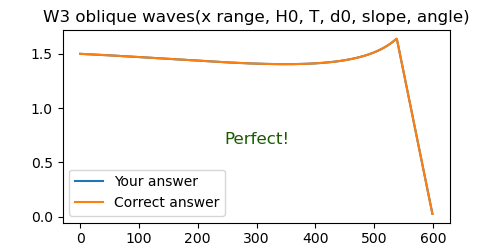

In [25]:
W3_plot_oblique_waves()

The code below can be used to assess the influence of changing conditions on the wave height.

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


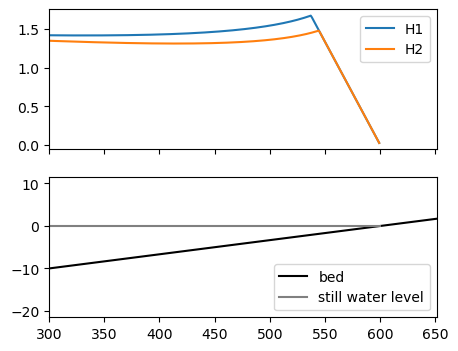

In [73]:
angle2 = 45

H1 = W3_oblique_waves(x_range, H0 = 1.5, T = 6, d0 = 20 , slope = 1/30, angle = 0)
H2 = W3_oblique_waves(x_range, H0 = 1.5, T = 6, d0 = 20 , slope = 1/30, angle = angle2)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(H1, label = 'H1')
axs[0].plot(H2, label = 'H2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

### 3.2.3) radiation stress (Sxx) for oblique waves

Can you calculate the crossshore distribution of the radiation stress (Sxx) by completing the code below?

In [12]:
# An example of the student's answer
H0, T, d0, slope, angle, rho = 1.5, 6, 20, 1/30, 10, 1025
x_range = np.arange(0,900,1)

def W3_radiation_stres_Sxx(x_range, H0, T, d0, slope, angle, rho):

    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
    
    '''Completed the code here'''
    snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)
    Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
    
    H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height

    g = 9.81
    E = 1/8*rho*g*H**2                            # The wave energy
    Sxx = (2*n-0.5)*E                             # Radiant stresses for oblique waves
    Sxx = (n-0.5+n*np.cos(theta_radians)**2)*E    # Radiant stresses

    return Sxx

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18252\1643685202.py:6: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


Matplotlib(Figure, dpi=100)
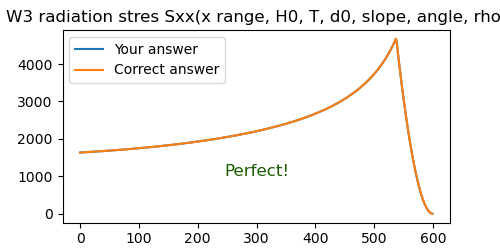

In [13]:
W3_plot_radiation_stres_Sxx()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


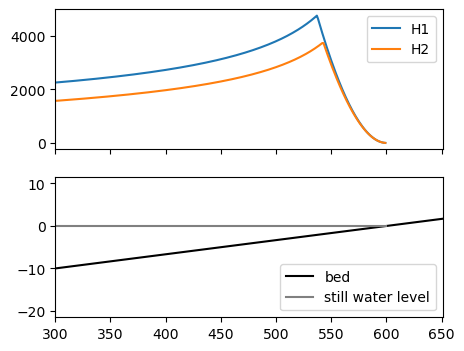

In [74]:
Sxx1 = W3_radiation_stres_Sxx(x_range, H0, T, d0, slope, angle = 0, rho = 1025)
Sxx2 = W3_radiation_stres_Sxx(x_range, H0, T, d0, slope, angle = 40, rho = 1025)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(Sxx1, label = 'H1')
axs[0].plot(Sxx2, label = 'H2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

--> Reflective questions

### 3.2.4) Mean water level under influence of oblique waves

The wave-induced setup and setdown can be calculated by the radiation stress $S_{xx}$ and the depth (h) according to:

\begin{equation}
\frac{d \overline{\eta}}{dx} = - \frac{1}{\rho g d} \frac{dS_{xx}}{dx}
\end{equation} 

It is not the radiation stress itself but <strong>its gradient</strong> what triggers a change in the mean water level.<br>
    Following week 1.5 of the MUDE and Waves, the equation can be discretized using forward Euler: 
\begin{equation}
\overline{\eta}_{i+1}=\overline{\eta}_{i} - \frac{S_{xx,i+1}-S_{xx,i}}{\rho g d_i}
\end{equation} 



In [35]:
def W3_wave_setup(x_range, H0, T, d0, slope, angle):
    
        # The environmental conditions
        x = x_range               # the horizontal axis
        zbed = -(d0 - slope * x)  # bed elevation [m]
        h = -zbed                 # still water depth [m]
        h[h < 0] = 0              # no negative depths
    
        # given conditions
        gamma = 0.8               # wave breaking ratio
        
        # The wave characteristics at every location in the cross-section
        L = np.array([wave_length(T, h) for h in h])  # The wavelength
        c = L/T                                       # The wave celerity
        k = 2*np.pi/L                                 # The wave number
        n = 0.5 + (k*h/np.sinh(2*k*h))                
        cg = n*c                                      # The wave group celerity
        Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
        
        snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
        theta_radians = np.arcsin(snell_constant * c)
        Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5

        
        H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
        Hbreaking = gamma * h                         # The wave-breaking height
        H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
        g = 9.81
        E = 1/8*rho*g*H**2                            # The wave energy
    
        Sxx = (2*n-0.5)*E                             # Radiant stresses
        Sxx = (n-0.5+n*np.cos(theta_radians)**2)*E    # radiant stresses for oblique waves

        ''' Adjusted the code to implement oblique waves, source: Computerlab by Jaime '''
        setup = np.zeros(Sxx.shape) # here we create a vector for the mean water level  
        for i in range(len(setup)-1):# key here is that setup[0] = 0 
            setup[i+1] = setup[i] - (Sxx[i+1]-Sxx[i])/(1000*g*h[i])
        
        return setup

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\677126571.py:31: RuntimeWarning: invalid value encountered in divide
  inaccuracy = np.abs(1-np.array(correct_answer)/np.array(student_answer))


Matplotlib(Figure, dpi=100)
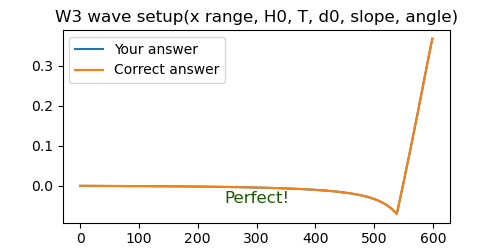

In [36]:
W3_plot_wave_setup()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


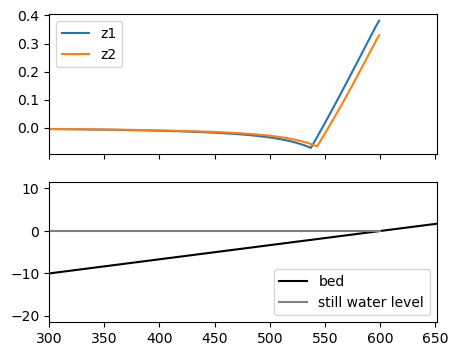

In [75]:
z1 = W3_wave_setup(x_range, H0, T, d0, slope, angle = 0)
z2 = W3_wave_setup(x_range, H0, T, d0, slope, angle = 40)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(z1, label = 'z1')
axs[0].plot(z2, label = 'z2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

--> reflective questions

### 3.2.5) The shorewards directed force (Fx)

We dive a bit deeper into the force in cross-shore direction that drives the wave setup (Fx). Can you calculate this force along the cross-shore for an alongshore uniform coast? For this question, you can consider using a similar approach as the setup is calculated, by using forward euler.

In [38]:
# an possible student answer
def W3_Fx(x_range, H0, T, d0, slope, angle):
    
        # The environmental conditions
        x = x_range               # the horizontal axis
        zbed = -(d0 - slope * x)  # bed elevation [m]
        h = -zbed                 # still water depth [m]
        h[h < 0] = 0              # no negative depths
    
        # given conditions
        gamma = 0.8               # wave breaking ratio
        
        # The wave characteristics at every location in the cross-section
        L = np.array([wave_length(T, h) for h in h])  # The wavelength
        c = L/T                                       # The wave celerity
        k = 2*np.pi/L                                 # The wave number
        n = 0.5 + (k*h/np.sinh(2*k*h))                
        cg = n*c                                      # The wave group celerity
        Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
        
        snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
        theta_radians = np.arcsin(snell_constant * c)
        Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5

        
        H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
        Hbreaking = gamma * h                         # The wave-breaking height
        H[H>Hbreaking] = Hbreaking[H>Hbreaking]         # Adjusting the wave height
        g = 9.81
        E = 1/8*rho*g*H**2                            # The wave energy

        Sxx = (n-0.5+n*np.cos(theta_radians)**2)*E    # Radiant stresses
        #Sxx = (2*n-0.5)*E                             # Radiant stresses for oblique waves

        ''' Adjusted the code to implement oblique waves, source: Computerlab by Jaime '''
        setup = np.zeros(Sxx.shape) # here we create a vector for the mean water level  
        for i in range(len(setup)-1):# key here is that setup[0] = 0 
            setup[i+1] = setup[i] - (Sxx[i+1]-Sxx[i])/(1000*g*h[i])

        Fx = np.zeros(Sxx.shape)
        for i in range(len(Fx)-1):
            Fx[i] = -(Sxx[i+1] - Sxx[i])/(x[i+1]-x[i])
        
        return Fx

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\677126571.py:31: RuntimeWarning: invalid value encountered in divide
  inaccuracy = np.abs(1-np.array(correct_answer)/np.array(student_answer))


Matplotlib(Figure, dpi=100)
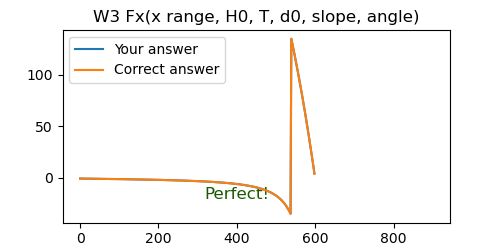

In [39]:
W3_plot_Fx()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


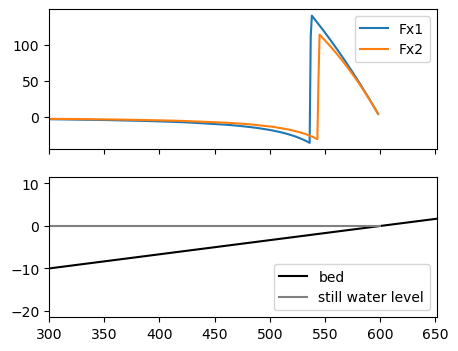

In [77]:
Fx1 = W3_Fx(x_range, H0, T, d0, slope, angle = 0)
Fx2 = W3_Fx(x_range, H0, T, d0, slope, angle = 45)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(Fx1, label = 'Fx1')
axs[0].plot(Fx2, label = 'Fx2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

### 3.2.6) Alongshore stresses (Syx, Syy) and forces (Fy).

Can you compute the radiation shear stress in y direction (Syx)?

In [79]:
def W3_Syx(x_range, H0, T, d0, slope, angle):

    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
    
    snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)
    Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
    
    H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
    g = 9.81
    E = 1/8*rho*g*H**2                            # The wave energy

    Syx = n * np.cos(theta_radians) * np.sin(theta_radians)*E
    
    return Syx

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


Matplotlib(Figure, dpi=100)
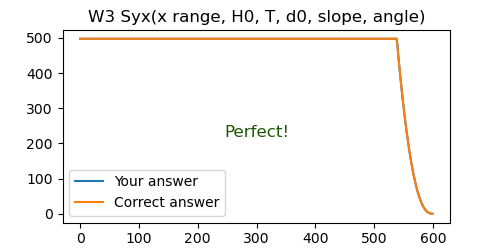

In [80]:
W3_plot_Syx()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


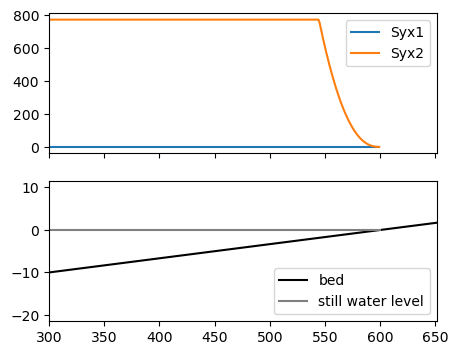

In [81]:
Syx1 = W3_Syx(x_range, H0, T, d0, slope, angle = 0)
Syx2 = W3_Syx(x_range, H0, T, d0, slope, angle = 45)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(Syx1, label = 'Syx1')
axs[0].plot(Syx2, label = 'Syx2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

And can you compute the alongshore force (Fy) for an alongshore uniform coast?

In [82]:
def W3_Fy(x_range, H0, T, d0, slope, angle):

    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
    
    snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)
    Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
    
    H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
    g = 9.81
    E = 1/8*rho*g*H**2                            # The wave energy

    Syx = n * np.cos(theta_radians) * np.sin(theta_radians)*E

    Fy = np.zeros(Syx.shape)
    for i in range(len(Fy)-1):
        Fy[i] = - (Syx[i+1] - Syx[i])/(x[i+1]-x[i])
    
    return Fy

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\677126571.py:31: RuntimeWarning: invalid value encountered in divide
  inaccuracy = np.abs(1-np.array(correct_answer)/np.array(student_answer))


Matplotlib(Figure, dpi=100)
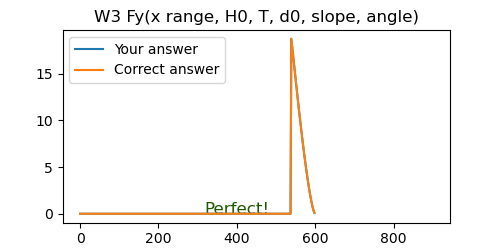

In [83]:
W3_plot_Fy()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3702750106.py:8: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


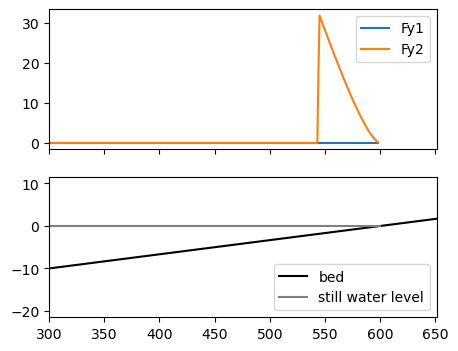

In [85]:
Fy1 = W3_Fy(x_range, H0, T, d0, slope, angle = 0)
Fy2 = W3_Fy(x_range, H0, T, d0, slope, angle = 45)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(Fy1, label = 'Fy1')
axs[0].plot(Fy2, label = 'Fy2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

### 3.2.7) Longshore current

Can you calculate the distribution of the longshore current, when a bottom roughness (r) of 6 cm is used in the friction factor $c_f$?

In [121]:
def W3_V(x_range, H0, T, d0, slope, angle, r):

    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
    
    snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)
    Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
    
    H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
    g = 9.81
    E = 1/8*rho*g*H**2                            # The wave energy

    #Syx = n * np.cos(theta_radians) * np.sin(theta_radians)*E

    dh_dx = np.zeros(len(h)) # dh/dx
    for i in range(len(dh_dx)-1):
        dh_dx[i] = (h[i+1] - h[i])/(x[i+1]-x[i])

    # page 198
    C = 18*np.log(12)*h/r                     # Chezy coefficient
    c_f = g/C**2                               # friction factor
    
    # formula 5.82 on page 226 of the book
    V = -5/16 * np.pi * gamma / c_f * g * np.sin(theta_radians[0])/c[0]*dh_dx
    V[H != Hbreaking] = 0 # function valid where waves are breaking
    
    return V

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3247582934.py:6: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3605762237.py:38: RuntimeWarning: divide by zero encountered in divide
  c_f = g/C**2                               # friction factor
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\2998979863.py:47: RuntimeWarning: divide by zero encountered in divide
  c_f = g/C**2                              # friction factor
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\677126571.py:31: RuntimeWarning: invalid value encountered in divide
  inaccuracy = np.abs(1-np.array(correct_answer)/np.array(student_answer))


Matplotlib(Figure, dpi=100)
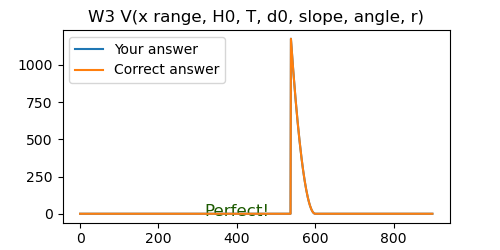

In [122]:
#x_range = np.arange(0,900,1)
W3_plot_V()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3247582934.py:6: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3605762237.py:38: RuntimeWarning: divide by zero encountered in divide
  c_f = g/C**2                               # friction factor


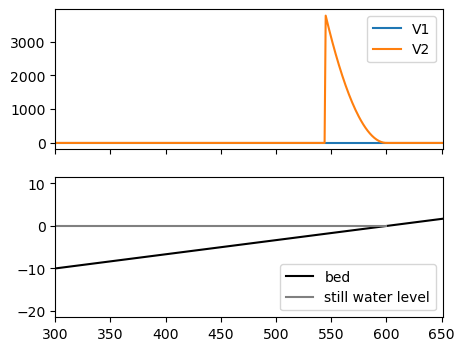

In [124]:
angle1, angle2 = 0, 45
V1 = W3_V(x_range, H0, T, d0, slope, angle1, r)
V2 = W3_V(x_range, H0, T, d0, slope, angle2, r)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(V1, label = 'V1')
axs[0].plot(V2, label = 'V2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

### 3.2.8) Wave induced local current, orbital velocity

Can you calculate the amplitude of the velocity (u0) near the bed through the linear wave theory?

In [126]:
def W3_u0(x_range, H0, T, d0, slope, angle):

    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
    
    snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)
    Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
    
    H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
    g = 9.81
    E = 1/8*rho*g*H**2                            # The wave energy

    # page 199 of the book
    omega = 2*np.pi/T
    u0 = 0.5* omega * H / (np.sin(theta_radians)*k*h)
    
    return u0

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3247582934.py:6: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


Matplotlib(Figure, dpi=100)
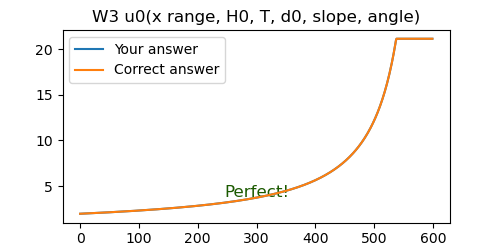

In [127]:
W3_plot_u0()

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3247582934.py:6: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)
C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\2311757824.py:32: RuntimeWarning: divide by zero encountered in divide
  u0 = 0.5* omega * H / (np.sin(theta_radians)*k*h)


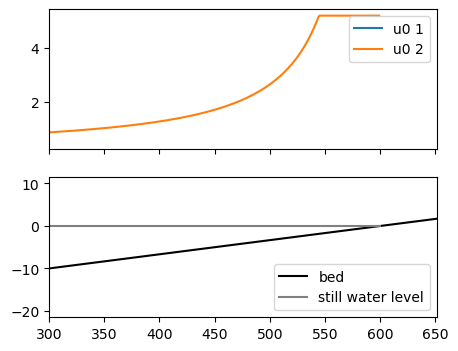

In [128]:
u0_1 = W3_u0(x_range, H0, T, d0, slope, angle = 0)
u0_2 = W3_u0(x_range, H0, T, d0, slope, angle = 45)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
axs[0].plot(u0_1, label = 'u0 1')
axs[0].plot(u0_2, label = 'u0 2')
axs[0].legend()
           
z_bed = -(d0 - slope * x_range)
x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
axs[1].legend();

# set the limits shown in the graph
axs[0].set_xlim(300,x0_id + 50);

### 3.2.9) Undertow velocity under wave through

In breaking waves, the mass transport towards the coast between wave crest and wave
trough may be quite large, resulting in rather large seaward-directed velocities under
the wave trough level

In [26]:
# page 202

In [27]:
def W3_u0(x_range, H0, T, d0, slope, angle):

    # The environmental conditions
    x = x_range               # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths

    # given conditions
    gamma = 0.8               # wave breaking ratio
    rho = 1025                # Density of water [kg/m3]
    
    # The wave characteristics at every location in the cross-section
    L = np.array([wave_length(T, h) for h in h])  # The wavelength
    c = L/T                                       # The wave celerity
    k = 2*np.pi/L                                 # The wave number
    n = 0.5 + (k*h/np.sinh(2*k*h))                
    cg = n*c                                      # The wave group celerity
    Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
    
    '''Completed the code here'''
    
    H = ...                                 # The wave height due to shoaling and refraction
    Hbreaking = gamma * h                         # The wave-breaking height
    H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
    g = 9.81
    E = 1/8*rho*g*H**2                            # The wave energy

    ''' finish the code here'''
    
    alpha = 1
    Er = ...
    
    q_non_break = ... = E/c
    q_roller = ... = alpha*Er/C
    q_drift = q_non_break + q_roller

    q_drift = q_drift[H == Hbreaking]

    u_trough = q_drift*np.cos(np.deg2rad(angle))/(rho*h)
    
    
    
    return u_trough

SyntaxError: cannot assign to ellipsis (997051413.py, line 34)

### 3.2.10) The influence of wave setup

The setup caused by waves influences the water depth. This might influence the waves as they propagate, especially in shallow water, were the setup is . The code below calculates the water depth iterative, if you complete it with the code you made before.

In [193]:
def W3_wave_setup2(x_range, H0, T, d0, slope, angle):

    fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(5,4), sharex=True, sharey = False)
    
           
    z_bed = -(d0 - slope * x_range)
    x0_id = np.argwhere(z_bed > 0)[0][0]  # first location where water depth = 0
    axs[1].plot(x_range, z_bed, color = 'k', label = 'bed')
    axs[1].plot(np.zeros(x0_id), color = 'grey', label = 'still water level' )
    axs[1].legend();

    # The environmental conditions
    x = x_range.copy()        # the horizontal axis
    zbed = -(d0 - slope * x)  # bed elevation [m]
    h = -zbed                 # still water depth [m]
    h[h < 0] = 0              # no negative depths
    setup = np.zeros(len(h))  # initial wave-induced setup

    # given conditions
    gamma = 0.8               # wave breaking ratio

    axs[0].plot(setup[h>z_bed], label = 'initial', color = 'grey')
    for i in range(3): # number of iterations considered
     
        # The wave characteristics at every location in the cross-section
        L = np.array([wave_length(T, h) for h in h])  # The wavelength
        c = L/T                                       # The wave celerity
        k = 2*np.pi/L                                 # The wave number
        n = 0.5 + (k*h/np.sinh(2*k*h))                
        cg = n*c                                      # The wave group celerity
        Ksh = np.sqrt(cg[0]/cg)                       # The shoaling parameter
        
        snell_constant = np.sin(np.deg2rad(angle))/c[0]  # apply snell's law
        theta_radians = np.arcsin(snell_constant * c)
        Kr = (np.cos(theta_radians[0])/np.cos(theta_radians))**0.5
        
        H = H0*Ksh*Kr                                  # The wave height due to shoaling and refraction
        Hbreaking = gamma * h                         # The wave-breaking height
        H[H>Hbreaking]=Hbreaking[H>Hbreaking]         # Adjusting the wave height
        g = 9.81
        E = 1/8*rho*g*H**2                            # The wave energy
    
        Sxx = (n-0.5+n*np.cos(theta_radians)**2)*E    # Radiant stresses

        setup = np.zeros(Sxx.shape) # here we create a vector for the setup
        for j in range(len(setup)-1):# key here is that setup[0] = 0 
            setup[j+1] = setup[j] - (Sxx[j+1]-Sxx[j])/(1000*g*h[j])

        setup_shoreline = setup[~np.isnan(setup)][-1] # get setup at the shoreline, which is the last non-Nan value
        setup[np.isnan(setup)] = setup_shoreline # apply the setup to the water level

        h = -zbed + setup         # the still water depth + setup
        h[np.isnan(h)] = 0
        h[h < 0] = 0

        x0_id = np.argwhere(z_bed > setup_shoreline)[0][0]  # first location where water depth = 0
        axs[0].plot(setup[0:x0_id], label = 'iteration ' + str(i))

    axs[0].legend()
    axs[1].legend()

    
    axs[0].set_xlim(520,x0_id + 50);

C:\Users\cdhoo\AppData\Local\Temp\ipykernel_18940\3247582934.py:6: RuntimeWarning: invalid value encountered in scalar divide
  L = 9.81 * T**2 / (2 * np.pi) * np.tanh(2 * np.pi * h / L)


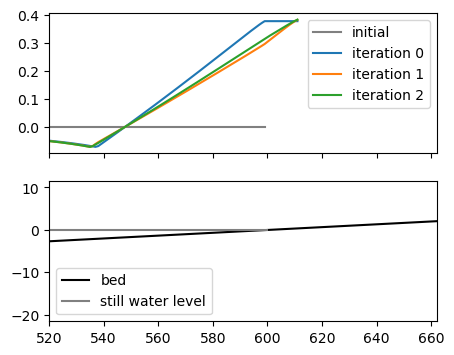

In [194]:
W3_wave_setup2(x_range, H0, T, d0, slope, angle)

#horizontale lijn aan het einde afbreken

# Overview of content

Will be deleted in the future

# week 4